In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris_flower=pd.read_csv('C:\\Users\\lison\\Documents\\Mini projet DIA2\\IRIS_ Flower_Dataset.csv')
iris_flower.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [10]:
X = iris_flower.drop('species', axis=1) 
y = iris_flower['species'] 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=52)
rf_classifier.fit(X_train, y_train) 
rf_predictions = rf_classifier.predict(X_test) 

In [13]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Precision : {rf_accuracy}")

Random Forest Precision : 0.9666666666666667


In [14]:
rf_classifier_modified = RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=42)
rf_classifier_modified.fit(X_train, y_train)
rf_predictions_modified = rf_classifier_modified.predict(X_test)
rf_accuracy_modified = accuracy_score(y_test, rf_predictions_modified)
print(f"Random Forest Modified Precision : {rf_accuracy_modified }")

Random Forest Modified Precision : 0.9666666666666667


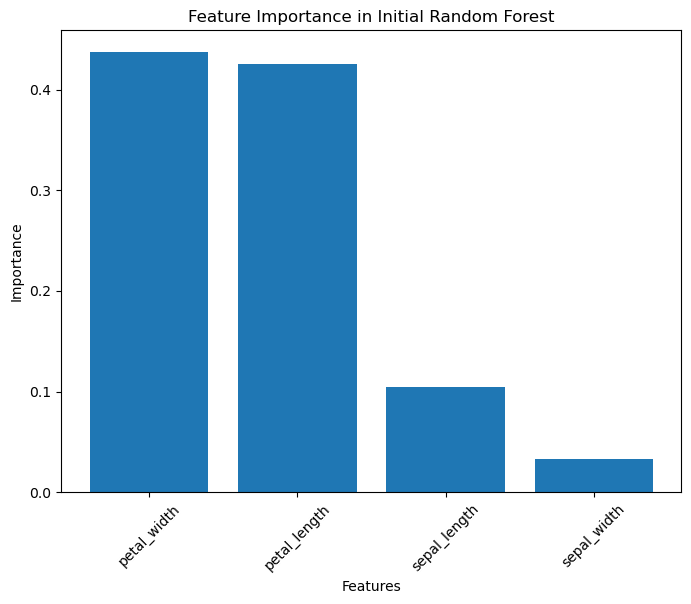

In [16]:
import numpy as np
import matplotlib.pyplot as plt

importance = rf_classifier.feature_importances_
indices = np.argsort(importance)[::-1] 

plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), importance[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.title('Feature Importance in Initial Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

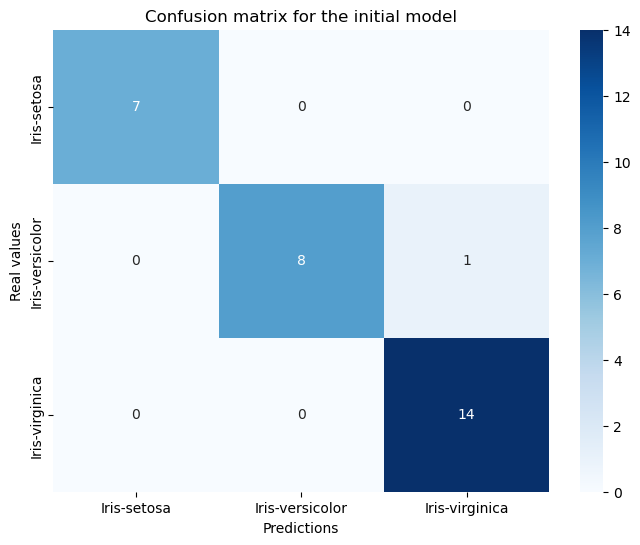

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predictions')
plt.ylabel('Real values')
plt.title('Confusion matrix for the initial model')
plt.show()